In [1]:
import numpy as np
from numpy.testing import assert_allclose
import time
from passive_extended_matchgate_simulator.raw_estimation import raw_estimate
from passive_extended_matchgate_simulator.utils import (ucj_to_compatible, 
                                                        ucj_to_compatible_fully_reduced, 
                                                        get_bitstrings_and_probs, 
                                                        make_parameterized_controlled_phase_circuit,
                                                        extract_circuit_data)

mean, var = 0, .00001
epsilon, delta, p = .1, .01, 1
norb, nelec = 63, (1,1)

circuit = make_parameterized_controlled_phase_circuit(norb, nelec, mean, var, reduced_interaction=True)
bitstrings, exact_probs = get_bitstrings_and_probs(circuit, norb, nelec) 
first_n_b = bitstrings[:5]
first_n_p = exact_probs[:5]

In [2]:
compatible = ucj_to_compatible(circuit)
t1 = time.perf_counter()
probs_compatible = [raw_estimate(circuit=compatible,
                                    outcome_state=b, 
                                    epsilon=epsilon, delta=delta, p=p) for b in first_n_b]
t2 = time.perf_counter()
assert_allclose(probs_compatible, first_n_p, rtol=0, atol=0.05)

print("time", t2 - t1)

time 9.785733290947974


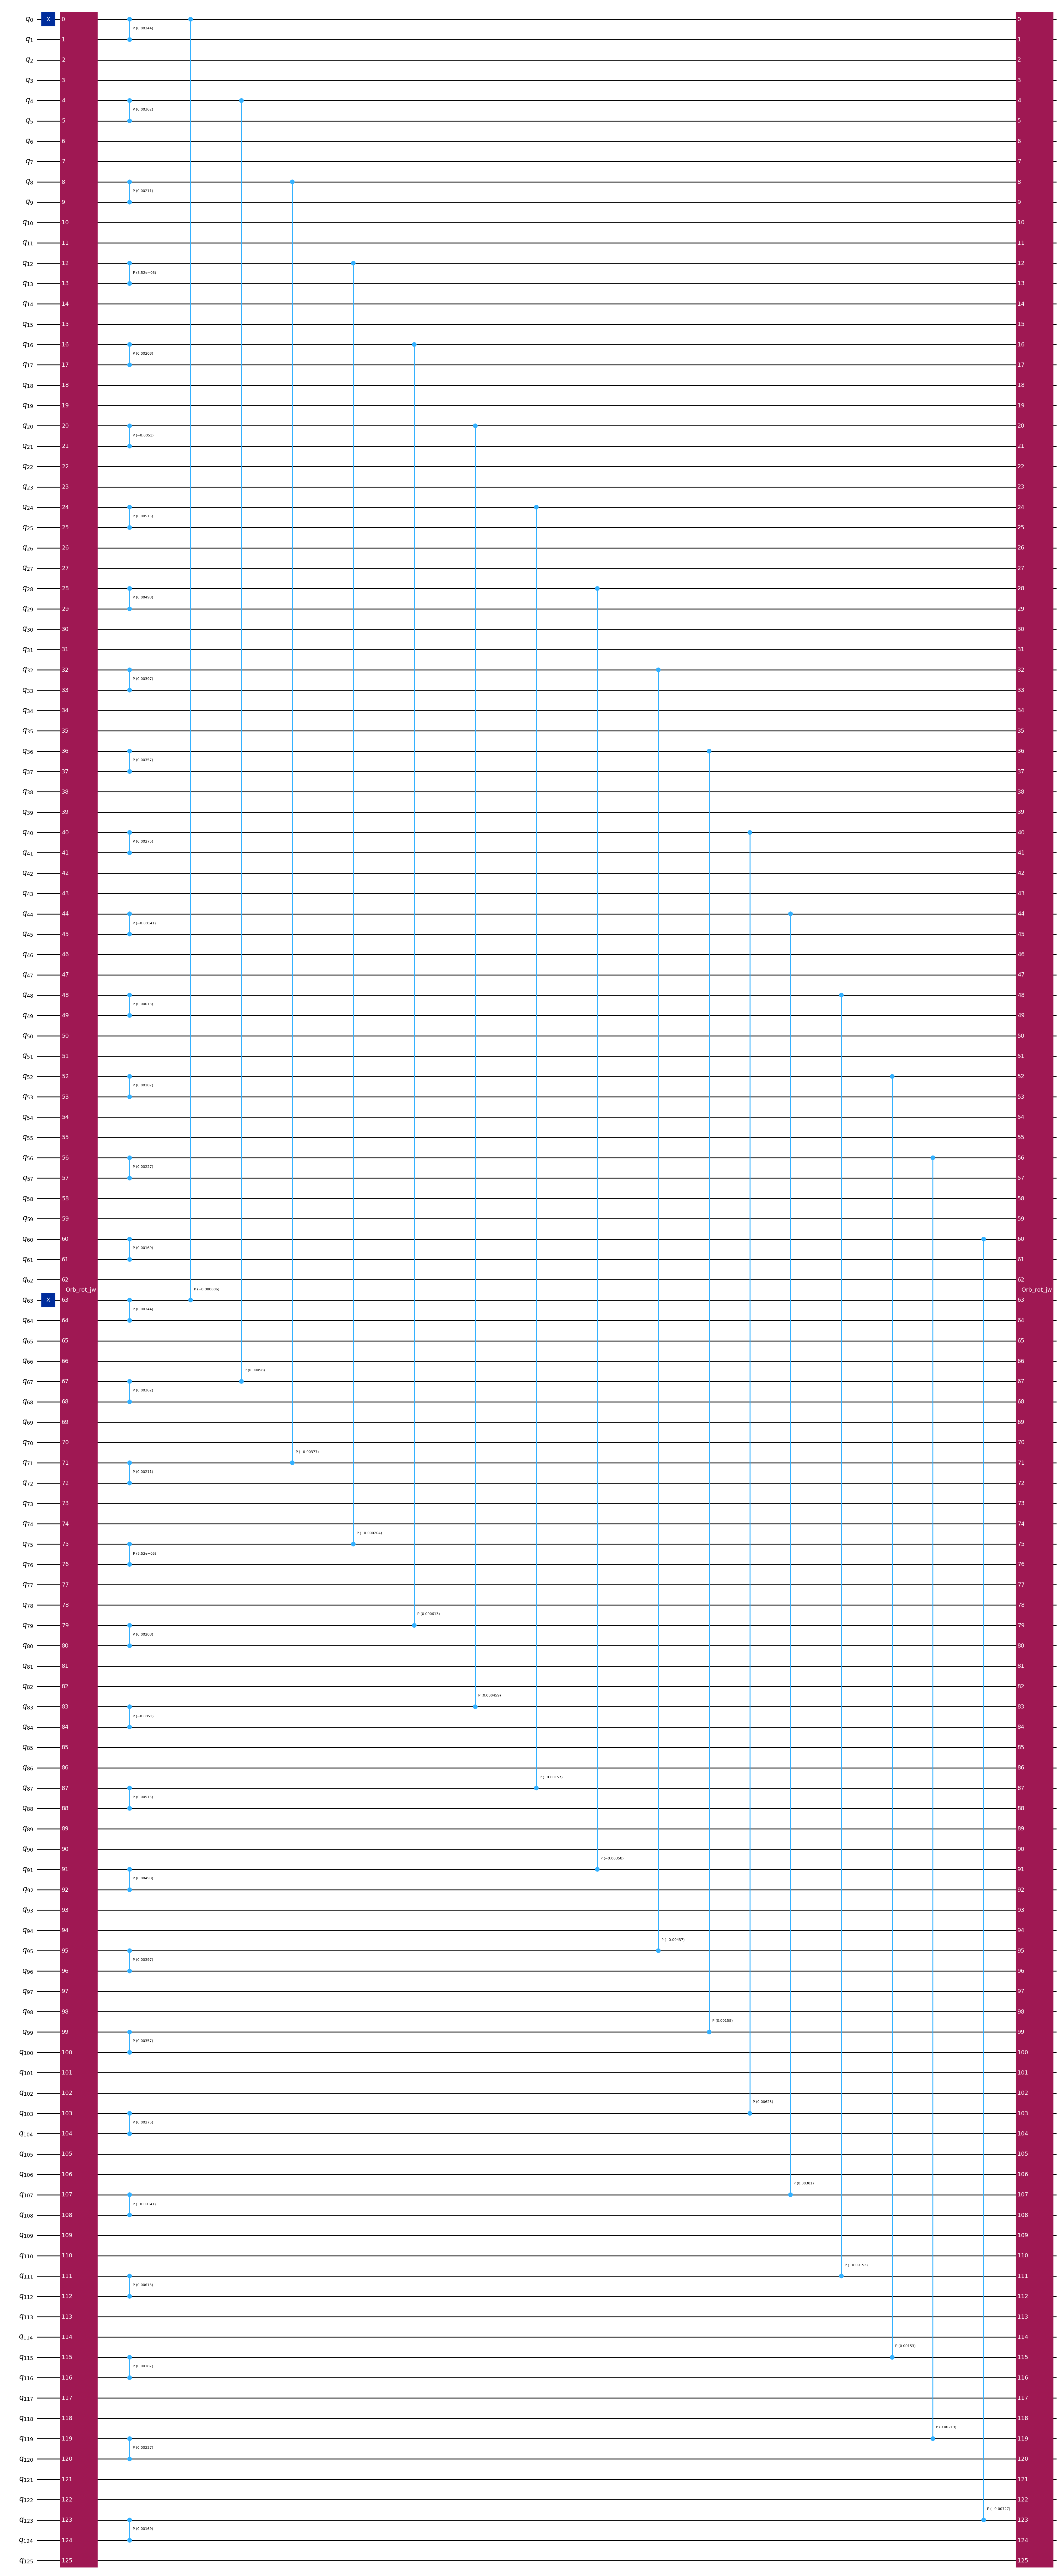

In [3]:
compatible.draw(fold=-1, output='mpl')

In [4]:
compatible.count_ops()

OrderedDict([('cp', 48), ('x', 2), ('orb_rot_jw', 2)])

In [5]:
compatible_fully_reduced = ucj_to_compatible_fully_reduced(circuit)
t1 = time.perf_counter()
probs_compatible_fully_reduced = [raw_estimate(circuit=compatible_fully_reduced, 
                                                outcome_state=b, 
                                                epsilon=epsilon, 
                                                delta=delta, 
                                                p=p) for b in first_n_b]
t2 = time.perf_counter()
assert_allclose(probs_compatible_fully_reduced, first_n_p, rtol=0, atol=0.05)

print("time", t2 - t1)

time 67.62897599994903


In [6]:
data = extract_circuit_data(compatible)
extent = data[1]
print('compatible extent', extent)
data_reduced = extract_circuit_data(compatible)
extent_reduced = data[1]
assert extent == extent_reduced

compatible extent 1.0722168850612523


In [7]:
for p in first_n_p:
    print(p)

0.9999999753734664
6.042825526147341e-13
2.39173291728865e-11
3.435429452357258e-11
3.118945619285008e-12


In [8]:
probs_compatible

[0.9993411742232009,
 1.0561242628544657e-09,
 4.007984979599373e-10,
 3.325864926490703e-11,
 6.247024765014413e-11]

In [9]:
probs_compatible_fully_reduced

[0.9976807721642807,
 3.851033903937356e-09,
 1.3993943974277702e-09,
 2.852013577981409e-09,
 2.3089011124016816e-09]

In [10]:
print('max compatible difference', max(abs(np.array(probs_compatible) - first_n_p)))
print('max compatible reduced difference', max(abs(np.array(probs_compatible_fully_reduced) - first_n_p)))

max compatible difference 0.0006588011502655089
max compatible reduced difference 0.0023192032091856607
